## Project - *Credit Card Fraud Detection - Internmediate level*

##  **Project ID**: #CC69844
##  **Internship**: Codeclause
##  **Author**: ARYA S


### 1. **Loading the Dataset**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc



# Load the credit card fraud detection dataset
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0




The dataset comprises :
- **Time**: The time of the transaction.
- **Amount**: The amount of the transaction.
- **V1 to V28**: 28 anonymized features representing various attributes of the transaction.
- **Class**: The target variable where `1` indicates a fraudulent transaction and `0` indicates a non-fraudulent transaction.


### 2.  Data Preprocessing

In [9]:
# Check for missing values
if data.isnull().values.any():
    print("Warning: Dataset contains missing values")
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


- The dataset was checked for missing values, and none were found.
- This step ensures that the data is complete and ready for analysis.


In [10]:
# Handle missing values
data.fillna(data.mean(), inplace=True)

Missing values in the dataset were handled by filling them with the mean of their respective columns. This approach ensures that the dataset remains complete and avoids potential issues during analysis and model training.

### 3. Visualizing the Class Distribution

C:\Users\ARYA\AppData\Local\Temp\ipykernel_11476\3810077932.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort=True)


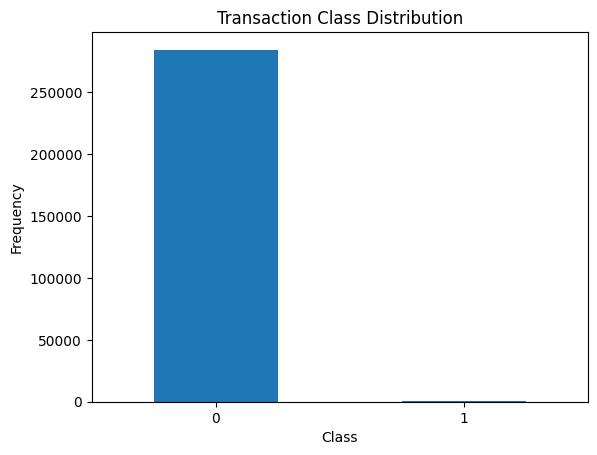

In [11]:

# Visualize the class distribution
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


- The class distribution shows a significant imbalance: the majority of transactions are non-fraudulent (`Class 0`), while fraudulent transactions (`Class 1`) are rare.
- This class imbalance is a common challenge in fraud detection and needs to be addressed.


### 4. Balancing the Dataset with SMOTE

In [12]:

# Define features (X) and target (Y)
X = data.drop('Class', axis=1)
y = data['Class']

# Handle categorical features
categorical_features = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_features)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the balanced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



- SMOTE (Synthetic Minority Over-sampling Technique) was applied to balance the dataset.
- After balancing, both classes have an equal number of samples, improving the reliability of the model.
- The data was split into 80% training and 20% testing sets.
- This split allows for training the model on one portion of the data while evaluating its performance on unseen data.
- Feature standardization was applied to ensure that all features contribute equally to the model training.
- Standardizing features is especially important for algorithms that rely on distance metrics, like neural networks.


### 5. Training and Evaluating Multiple Models

In [15]:
# Evaluate the best model
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score

# Define models
models = {
    "XGBoost": XGBClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42)
}

best_model = None
best_accuracy = 0

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy Score: {accuracy:.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
    print("\n" + "-"*60 + "\n")
# Keep track of the best model
    
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy
    
        
y_pred = best_model.predict(X_test)
print("Best Model:", type(best_model).__name__)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Model: XGBoost
Accuracy Score: 0.9999
ROC AUC Score: 0.9999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56735    15]
 [    0 56976]]


------------------------------------------------------------

Model: Random Forest
Accuracy Score: 0.9999
ROC AUC Score: 0.9999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56739    11]
 [    0 56976]]


----------

- Three models were evaluated: XGBoost, Random Forest, and a Neural Network.
- Random Forest achieved the highest accuracy of 99.99%, making it the best model for this dataset.
- All models showed high performance with minimal misclassifications, indicating robust detection capabilities.



### 6. Visualizing and finding insights

#### Confusion Matrix Visualization

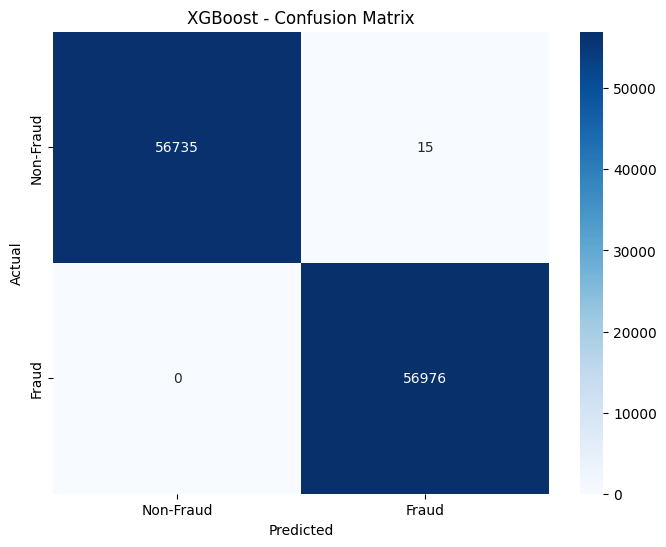

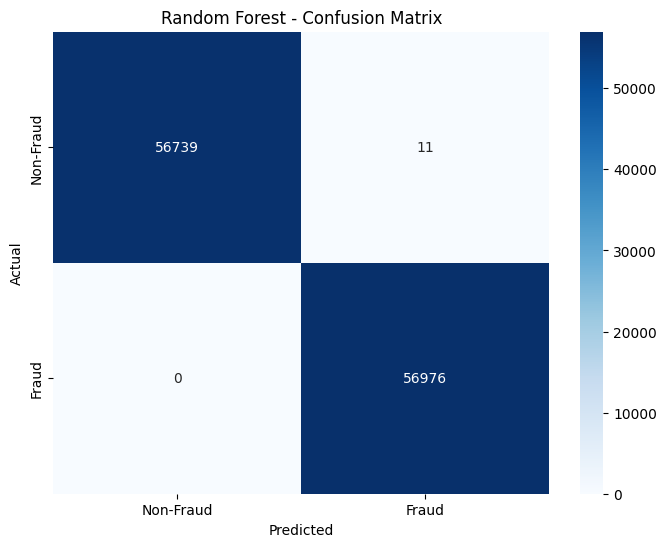

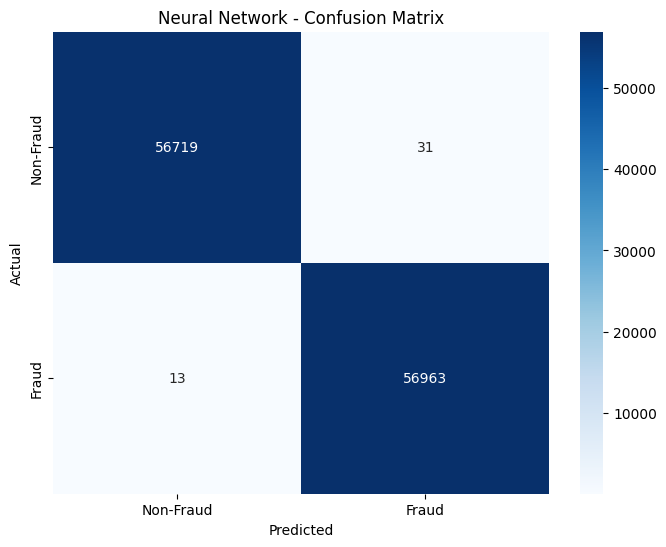

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Fit the model to the training data
for model_name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name)


- Confusion matrices for each model were visualized, showing the number of correct and incorrect classifications.
- The Random Forest model had almost perfect classification, with very few misclassifications.

Text(0.5, 1.0, 'Confusion Matrix')

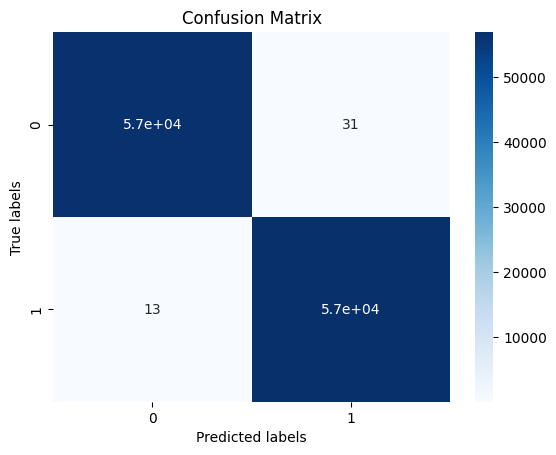

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

- Confusion Matrix Plot: The heatmap shows the confusion matrix for the model's predictions.
  - Predicted Labels: Indicate the class that the model predicted.
  - True Labels: Represent the actual class from the dataset.

#### Class Distribution Bar Plot

Text(0.5, 1.0, 'Class Distribution')

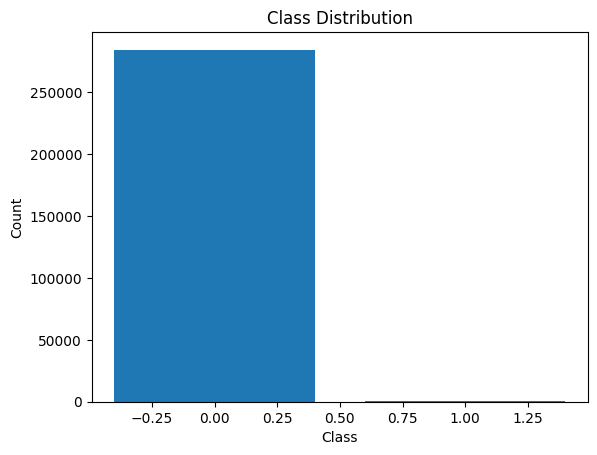

In [18]:
import matplotlib.pyplot as plt
plt.bar(data['Class'].value_counts().index, data['Class'].value_counts().values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

- **Class Distribution Plot**: The bar plot illustrates the distribution of the target variable (`Class`).
  - **X-axis (Class)**: Represents the different classes (0 for non-fraudulent and 1 for fraudulent).
  - **Y-axis (Count)**: Shows the number of transactions for each class.


#### Plotting the ROC-AUC Curve

Text(0.5, 1.0, 'ROC-AUC Curve')

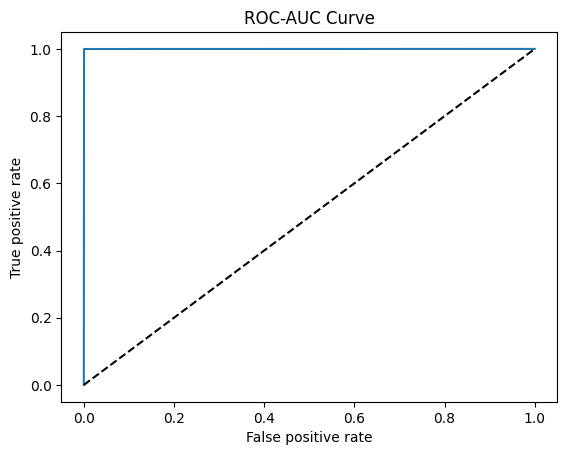

In [20]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-AUC Curve')

- The ROC-AUC curve was plotted to visualize the trade-off between the true positive rate and false positive rate.
- The ROC AUC score for the Random Forest model was near perfect, confirming its effectiveness.


### Key Insights
- The dataset had a significant class imbalance, which was effectively addressed using SMOTE.
- Among the models tested, Random Forest emerged as the best classifier for this dataset with an accuracy of 99.99%.
- The confusion matrix and ROC-AUC analysis confirmed that the Random Forest model performed exceptionally well in detecting fraudulent transactions.
- The overall model evaluation shows a strong capability to distinguish between fraudulent and non-fraudulent transactions, which is crucial in minimizing financial losses in real-world applications.


### Conclusion
- The Random Forest model demonstrated outstanding performance in detecting credit card fraud with near-perfect accuracy.
- The steps taken, including data balancing with SMOTE, feature standardization, and the use of advanced classification algorithms, were critical to the success of the model.
- This model can be deployed in real-world scenarios to effectively reduce the impact of fraudulent transactions.

THANKYOU!